# A large box store wants to enter the italian market

Date: 17/04/2024 <br>
Version: 2 <br>

**Course**: Managerial Decision Making & Modeling

**Investigator(s)**
- Giuseppe Massidda , 901029@stud.unive.it
- Lorenzo Muscillo , 1000916@stud.unive.it

# 1 - Abstract
This project aims to analyze optimal store locations for a chosen company, exemplified by a Walmart supermarket chain but applicable to any business. 
The process involves various functions within the code: web scraping to identify available land, an API to obtain coordinates of selected locations, and a distance calculation function accounting for the Earth's curvature. The code offers flexibility, allowing modification of parameters to suit specific purposes. 
While the results aren't unique due to this adaptability, they provide practical insights. However, it's crucial to validate assumptions and results through testing and real-world data. 
Despite the comprehensive approach, unexpected factors may affect the practicality of outcomes. In conclusion, the combination of our assumptions and the code appears promising, but further refinement and validation are necessary for practical application.

# 2 - Problem statement
<hr>

The board of Walmart Inc. commissioned an analysis of different scenarios of potential entry in the Italian market. The main issue that walmart faces when entering a different country relates to the cultural affinity of the customers for Walmart's brand and value proposition. For this reason, the board decided to start operating only in the Lombardia region. 

The goal of the operation is maximizing profits of the first twenty years.

Profits are estimated by subtracting the initial investment expenses to the present value of the expected EBITDA (earnings before depreciation and amortization, margine operativo lordo) over the twenty years period. The initial investments will have to include the purchasing price of the properties as well as the costs associated with constructing the stores.

The present value of future EBITDA over a long period can be calculated by first estimating a yearly EBITDA, and then adding together all the discounted values by a rate of 10%.

In general, a store's EBITDA is proportional to its number of customers. People are less likely to go into a store if they live far away from it. However, larger stores will attract more customers than smaller ones.

The board wants to know how many stores should be opened and where. The main challenge is finding suitable locations. A Walmart store is built on a large lot of land that has room for a large parking lot. For this reason empty lots are preferred to preexisting commercial buildings. Lots have to be within 20 and 60 thousands square meters.






# 3 - System

## 3.1 - Agents/DMs

The main decision maker is the company. Its objective is to place a number of stores in such a way that maximises profits.

Customers are another agent of the system, they can be modeled as a population center (comune) that can be served by only one store.

## 3.2 - Entities

The potential lots to to be acquired are the key components of the system.
Large commercial lots for sale on immobiliare.it will be considered. Data that has to be collected relates to the price, the location of the lot so that its distance from customers can be calculated.



## 3.3 - Relationships among elements

A store EBITDA depends on the positioning of the stores, the closer a store is to a population center the higher it will be. EBITDA is also higher for larger stores.
Costs are made up by two factors: a fixed cost that is the purchasing price of the lot, and a variable cost of construction that increases with the size of the store.

## 3.4 - Other constituents of the system

The success of such operation relies also on factors that are hard to model mathematically, for example cultural affinity of the customers for the brand and value proposition.

Also there is a lot of uncertainty coming from the number of metrics that have to be estimated: average construction cost as a function of size; average share of a comune's population that can be attracted by a store as a function of its size and distance; average EBITDA as a function of the population attracted.

## 3.5 - Assumptions

**Assumption**: EBITDA is linearly proportional to number of customers attracted.

**Assumption**: A comune's entire population can be served only by one store.

**Assumption**: The number of customers attracted by a store is:
- decreasing in distance to the store.
- increasing in the size of the store.

**Assumption**: Costs are made up by two components:
- the purchase price of the lot,
- the construction costs, which are proportional to the lot size.



# 4 - Data

Data on comuni comes from Lombardia_tavole2021-Censimento-permanente.xlsx downloaded from ISTAT

Other data comes from web scraping / web API requests from Immobiliare.it and OpenstreetMap

**Assumption**: lots can be purchased from many different channels, however we will consider only the ones listed for sale on immobiliare.it for which an address/coordinates as well as price and surface area are provided. We will use a web scraping script to download the data. We will use the openstreetmap overpass API to get the coordinates of a property from its address.

Thus data on the lots/properties will be a data frame with four columns: price, area, latitude, longitude.

**Assumption** We will assume the population is entirely concentrated in the center of the comune. Population data will be taken from ISTAT website. The customers data will be represented in a dataframe with all the comuni in the rows,  one column for population and two columns for latitude and longitude. Again the coordinates will be taken with an API query to openstreetmap.

**Assumption** The earth is a perfect sphere, the distance between two points is the great circle distance calculated with the haversine function.


**Assumption** The yearly EBITDA of a store is equal to the number of customers attracted times a constant that can be estimated looking at competitors. Esselunga in 2022 had 500 million EBITDA with 174 stores and 5 million customers who signed up for a fidelity card. https://www.esselunga.it/it-it/investor-relations/financial-information.html.

Roughly 3 million EBITDA per store that has an average of 30 thousands customers. We will calculate yearly EBITDA for each store as 100€ times the number of customers.


**Assumption** the number of customers from comune $C_i$ attracted by a store in $P_j$ is equal to $POP_i \cdot f_1(dist(C_i,P_j)) \cdot f_2(SIZE_j)$

$f_1$ is a function $ dist \mapsto [0,1]$ that gives the proportion of total population that considers being a customer of a store. As the distance increases, the proportion decresases.

$f_2$ is a function $ SIZE_j \mapsto [0,1]$ that gives the proportion of population that becomes a customer of a store, given its size. The larger the store the higher this proportion gets.

We will assume that a person at distance 0 will become a customer of the store with 20% probability. This probability will linearly decrease as it gets to 66.7 km, than it will be 0%.

 $f_1(dist) = \max(0;0.2 - dist * 0.003)$

$f_2$ will be modeled as 0.8 for the smallest possible property (20 thousands $m^2$), linearly increasing to 0.9 for the largest possible property (60 thousand $m^2$) 

$f_2(SIZE) = 0.75 + 0.0025 * SIZE$


**Assumption** The cost of building a store in location P_j is the sum of the price and the construction cost, estimated as 1000€ per square meter


# 5 - Scenario 1


## 5.1 - Mathematical model 


$C$ = Set of $n$ municipalities $\cong \{1,...,n\}$ <br>
$POP_{i}$ = Population of municipality for every $i \in \{1,\dots,n\}$ <br>

$P$ = Set of $m$ Properties for sale<br>
for every property we have $SIZE_j$ and $PRICE_j$ with $j \in \{1,...,m\}$ 


For every pair $(C_i , P_j)$ we have a distance in km $dist_{i,j}$

<hr>

*Decision Variables* <br>

$y_j = \{ 0;1 \}$ if $P_j$ is choosen as a location to build a store

$x_{i,j} = \{ 0;1\}$ if $P_{j}$ serves $C_i$
<hr>

We estimate the yearly EBITDA of a store in property $P_j$ as:

$EBITDA{j} = 100 € * \sum^{n}_{i = 1} customers_{i,j} * x_{i,j}$

where $customers_{i,j} = POP_i * \max(0.3 - 0.003 * dist(C_i,P_j);0) * (0.75 + 0.0025*SIZE_j)$

After estimating yearly EBITDA, we calculate the total over the full investment period of 20 years in the following way: $total\_EBITDA_j = \sum_{i=0}^{19} EBITDA_j \cdot (1+0.1)^{-i}$

<hr>

We estimate the cost of building a store in $P_j$ as

$COST_{j} = y_j * (PRICE_j + (1000 * SIZE_j))$ <br>

<hr>

The profits, the objective function to maximize will be

$profits = \sum_{j = 1}^m total\_EBITDA_j - COST_j$

<hr>

The constraints are 

$\sum_{j = 1}^m x_{i,j} \le 1 \quad \quad \forall i \in \{1,\dots,n\}$  each comune can be served by only one store

$x_{i,j} \le y_j \quad \quad \forall i \in \{1,\dots,n\} \quad \forall j \in \{1,\dots,m\}$ comune $i$ can be served by store $j$ only if there is a store in $P_j$

### 5.1.1 - Preliminary operations


In [3]:
# Importing required libraries
import pandas as pd             
import numpy as np              
import math

import json # JavaScript Object Notation encoding and decoding library

import re # Regular expression operations library                     

import requests # HTTP library for making requests                 

import matplotlib.pyplot as plt # Plotting library

from bs4 import BeautifulSoup # Library for pulling data out of HTML and XML files  

import pyomo.environ as pyo # Python optimization modeling objects library    

import folium # Library for creating interactive maps

from IPython.display import display # Library for displaying objects in Jupyter Notebook

### 5.1.2 - Sets


#### Getting data on properties for sale

In [ ]:
# Web scraping functions to search the informations that we need for the properties.

# Function to get the BeautifulSoup object from a URL
def get_soup(url, params=None, headers=None):
    response = requests.get(url, params=params, headers=headers)
    soup = BeautifulSoup(response.content, "html.parser")
    return soup

# Function to get the number of pages from the pagination section of the website
def get_num_pages(url):
    soup = get_soup(url)
    pages_div = soup.find_all("div", class_="in-pagination__item")
    pages_a = soup.find_all("a", class_="in-pagination__item")

    pages_div = [page.text for page in pages_div]
    pages_a = [page.text for page in pages_a]

    num_list = list()
    for page in pages_a + pages_div:
        try:
            num = int(page)
            num_list.append(num)
        except:
            continue
    return max(num_list)

# Function to extract information about a single property listing from HTML
def get_info_from_ad(ad):
    title = ad.find("a", class_="in-reListCard__title").text
    price = ad.find("div", class_="in-reListCardPrice").text
    infos = ad.find_all("div", class_="in-reListCardFeatureList__item")
    infos_text = [info.text for info in infos]
    res = {"title": title, "price": price, "infos": infos_text}
    return res

# Function to scrape information about multiple property listings from a URL
def get_immobiliare_info(url, params=None, headers=None):
    soup = get_soup(url, params=params, headers=headers)
    lands = soup.find_all("div", class_="nd-mediaObject__content")
    res = []
    for i, land in enumerate(lands):
        res.append(get_info_from_ad(land))
    return res

# Function to retrieve information about all property listings in a specific region
def get_all_from_region(region):
    url = "https://www.immobiliare.it/vendita-terreni/{}/?criterio=rilevanza&superficieMinima=20000&superficieMassima=60000&idTipologia=107".format(
        region)
    url_with_page_num = url + "&pag={}"

    num_pages = get_num_pages(url)
    items = list()
    for i in range(1, num_pages + 1):
        items.extend(get_immobiliare_info(url_with_page_num.format(i)))
    return items

# Dictionary to store all property listings
all_ads = dict()
for region in ["lombardia"]:
    all_ads[region] = get_all_from_region(region)

# Print the number of lands found for each region
for region in all_ads:
    print(region, "number of lands:", len(all_ads[region]))

# Save the results to a JSON file
import json
with open("ad.json", 'w') as json_file:
    json.dump(all_ads, json_file)

In [ ]:
# Open the JSON file containing property listings
with open("ad.json", "r") as json_file:
    all_ads = json.load(json_file)

# Initialize lists to store property information
streets = []
prices = []
titles = []
surfaces = []

# Loop through each region and its corresponding property listings
for region, ads in all_ads.items():
    for ad in ads:
        title = ad["title"]
        price = ad["price"]
        surface = ad["infos"]

        streets.append(title)  # Append title to the streets list (not used further)
        prices.append(price)   # Append price to the prices list
        titles.append(title)   # Append title to the titles list
        surfaces.append(surface)  # Append surface info to the surfaces list

# Create a DataFrame from the collected data
data = {
    "Title": titles,
    "Price": prices,
    "Surface m^2": surfaces
}
df_prop = pd.DataFrame(data)

# Clean up the 'Title' column
# Remove "Terreno edificabile" from the titles
df_prop["Title"] = df_prop["Title"].str.replace("Terreno edificabile", "")
# Capitalize the first letter of each title
df_prop["Title"] = df_prop["Title"].str.capitalize()

# Remove rows containing "Terreno residenziale" or "Prezzo" in the 'Title' column
df_prop = df_prop[~df_prop["Title"].str.contains("Terreno residenziale")]
df_prop = df_prop[~df_prop["Price"].str.contains("Prezzo")]

# Remove "centro" from the titles
pattern = r'\bcentro\b'
df_prop['Title'] = df_prop['Title'].str.replace(pattern, '', regex=True, case=False)

# Capitalize the first letter of each title again
df_prop['Title'] = df_prop['Title'].apply(capitalize_first_letter)

# Function to extract and convert surface area to float
def extract_and_convert_to_int(lst):
    match = re.search(r'\d+\.\d+', lst[0])
    if match:
        numeric_part = match.group()
        return float(numeric_part)
    else:
        return None
    
# Apply the function to the 'Surface m^2' column
df_prop['Surface m^2'] = df_prop['Surface m^2'].apply(lambda x: extract_and_convert_to_int(x))


In [ ]:
# Function to convert string representation of price to numerical value

def string_to_num(string):
    # Define the regex pattern to match numbers
    pattern = r'\d+'

    # Find all matches in the string
    matches = re.findall(pattern, string)
    # Concatenate the matched digits
    euro_amount = ''.join(matches)
    return int(euro_amount)

# Apply string_to_num function to convert 'Price' column to numerical values
df_prop["Price"] = df_prop["Price"].apply(string_to_num)

# Function to exclude outliers from a DataFrame column using the Interquartile Range (IQR) method
def exclude_outliers(df, column_name, threshold=0.5):
    """
    Exclude possible outliers from a DataFrame column using the Interquartile Range (IQR) method.
    
    Parameters:
        df (pandas.DataFrame): The DataFrame containing the column.
        column_name (str): The name of the column containing the data.
        threshold (float): The threshold value to determine outliers. Default is 1.5.
    
    Returns:
        pandas.DataFrame: DataFrame with outliers excluded.
    """
    column = df[column_name]
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - threshold * iqr
    upper_bound = q3 + threshold * iqr
    
    # Exclude outliers
    df_filtered = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    
    return df_filtered

# Exclude outliers from the 'Price' column using the exclude_outliers function
df_prop = exclude_outliers(df_prop, "Price")
df_prop.reset_index(inplace=True, drop=True)


In [ ]:
# From the web scraping we obtained the street but not the coordinates, so we create some function that
# use an API from OpenStreetMap to get latitude and longitude.

def get_coordinates(address):
    url = "https://nominatim.openstreetmap.org/search"
    params = {'q': address, 'format': 'json'}
    response = requests.get(url, params=params)
    if response.status_code == 200:
        data = response.json()
        if data:
            latitude = float(data[0]['lat'])
            longitude = float(data[0]['lon'])
            return latitude, longitude
        else:
            return None, None
    else:
        print("Error:", response.text)
        return None, None

df_prop['Latitude'], df_prop['Longitude'] = zip(*df_prop["Title"].map(lambda x: get_coordinates(x)))
df_prop.dropna(inplace=True)

df_prop.reset_index(inplace = True, drop = True)
df_prop.to_csv("df_prop.csv")
df_prop

#### Getting data on Comuni

In [ ]:
# DO NOT RUN
# This queries the openstreetmap overpass API 1500 times
# it gets all the coordinates for each comune in Lombardia

df = pd.read_excel("Lombardia_tavole2021-Censimento-permanente.xlsx", sheet_name="Tavola A1_COMUNI", skiprows=2)
df_pop = df[["PROVINCE","Denominazione Comune", "Popolazione al 1° gennaio - Totale"]]

df_pop['Latitude'], df_pop['Longitude'] = zip(*df_pop["Denominazione Comune"].map(lambda x: get_coordinates(x)))

df_pop

### 5.1.3 - Parameters


In [7]:
df_prop = pd.read_csv("df_prop.csv", index_col= 0)
df_ter = pd.read_csv("pop.csv")

def calculate_distance_matrix(df_prop, df_ter):

    # Now we need to calculate the distance matrix, that has 
    # the point to point distance between all 152 properties and all 1506 comuni.
    # Note that 152 times 1506 = 228912

    # Function for calculating distance
    def haversine(lat1, lon1, lat2, lon2):
        # Convert latitude and longitude from degrees to radians
        lat1 = math.radians(lat1)
        lon1 = math.radians(lon1)
        lat2 = math.radians(lat2)
        lon2 = math.radians(lon2)

        # Haversine formula
        dlon = lon2 - lon1
        dlat = lat2 - lat1
        a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
        c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
        distance = (6371 * c)  # Radius of the Earth in kilometers 

        # Manhattan theorem

        # distance = (abs(dlon)* 0.5) + (abs(dlat)*0.5)

        return distance 

    # Using a list comprehension and a dict comprehension to calculate everything in a single line
    distances = {j : 
                 [haversine(df_ter.loc[i,"Latitude"],df_ter.loc[i,"Longitude"],
                            df_prop.loc[j,"Latitude"], df_prop.loc[j,"Longitude"]) 
                  for i in range(df_ter.shape[0])] 
                  for j in range(df_prop.shape[0])}

    # Making it into a DataFrame
    distances = pd.DataFrame(distances)
    distances.columns.name = "Comuni"
    distances.index.name = "Properties"
    # Distances = distances.transpose()
    return distances

distances_matrix = calculate_distance_matrix(df_prop, df_ter)

# Now that we have the distance matrix,
# we can calculate the number of customers that
# each property gets from each municipality
# as we defined it, it's the product of 3 values, population, f_1(dist) and f_2(size)

def plot_f1_f2(f1,f2):

    x1 = np.linspace(0, 200, 100)  # Adjust the range and number of points as needed

    # Generate x values for f2 (kilometers)
    x2 = np.linspace(20, 60, 100)

    # Calculate y values for each function
    y1 = [f1(val) for val in x1]
    y2 = [f2(val) for val in x2]

    # Create subplots
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # Adjust the figsize as needed

    # Plot the functions
    axs[0].plot(x1, y1, label='f1(x)')
    axs[0].set_title('Function f1')
    axs[0].set_xlabel('Distance, kilometers')
    axs[0].set_ylabel('Probability of attracting a customer')
    axs[0].legend()

    axs[1].plot(x2, y2, label='f2(x)', color='orange')
    axs[1].set_title('Function f2')
    axs[1].set_xlabel('Size, thousands of square meters')
    axs[1].set_ylabel('Probability of attracting a customer')
    axs[1].legend()

    # Show plot
    plt.tight_layout()
    plt.show()

def get_ebitda_matrix(df_prop = df_prop, df_ter = df_ter,yearly_ebitda_per_customer = 100,
                  n_years_to_make_back_the_investment = 5, discount_rate = 0.05, distances = distances_matrix,
                  f1 = lambda x: max(0, 0.3 - x * 0.003), f2 = lambda x: x* 0.0025 + 0.75):      

       # Calculating f1: the fraction of customers that store j attract from comune i, given their distance
       f_1_values = np.vectorize(f1)(np.asarray(distances))#(0.3 - np.asarray(distances) * 0.003)
       # f_1_values[f_1_values < 0] = 0 #where it's negative we make it 0

       print("checking that f1 is the interval [0,1]: ",
              (f_1_values >= 0).sum().sum() == f_1_values.size & (f_1_values <= 1).sum().sum() == f_1_values.size)


       # Calculating f2: the proportion of customers a store attracts given its size.
       # We calculate this value for each store,
       # then we turn it into a matrix by repeating the vector along the rows.
       # This way the matrix is ready to by multiplied with the other matrices
       f_2_values = np.vectorize(f2)(np.asarray(df_prop["Surface m^2"]))
       f_2_values = np.tile(f_2_values,(distances.shape[0],1))

       print("checking that f2 is the interval [0,1]: ",
              (f_2_values >= 0).sum().sum() == f_2_values.size & (f_2_values <= 1).sum().sum() == f_2_values.size)
       plot_f1_f2(f1,f2)

       # Now we make a population matrix, in a similar way that we did for f2 values
       # the population is a vector, with one component for each municipality C,
       # we repeat the vector many times, one per store so that we can multiply the matrices
       pop_matrix = np.tile(np.asarray(df_ter.iloc[:,2]),(distances.shape[1],1)).T

       # Calculating the number of customers that from municipality i will be a customer of a store in property j
       customers_ij = pop_matrix * f_1_values * f_2_values
       # Now just multiplying the number of customers times 100€ to calculate the yearly EBITDA

       yearly_ebitda_ij = customers_ij * yearly_ebitda_per_customer
       ebitda_ij = sum([yearly_ebitda_ij * (1+discount_rate)**-i for i in range(n_years_to_make_back_the_investment)]) 
       ''' La rendita anticipata segue la seguente formula V[0] = R * ((1-(1+i)^-n)/i) * (1+i) ora non so bene cosa
       intendiamo noi come rendita, in alternativa ho scontato nella formula sopra l'ebitda, capiamo...'''

       return ebitda_ij 


# Calculating the costs per each properties,
# this is the cost vector that will be multiplied by the y_j variables
def get_cost_vector(df_prop = df_prop, construction_cost = 1000):
    price_j = df_prop.Price

    # The construction cost is 1000 per square m, we have the data as thousands of square m
    # we can just multipy it by 1000 so we get the construction cost in thousand of euros
    construction_j = df_prop["Surface m^2"] * construction_cost * 1000

    cost_j = price_j + construction_j
    return cost_j

def get_coefficients(df_ter = df_ter, df_prop = df_prop, 
                     yearly_ebitda_per_customer = 100,
                     n_years_to_make_back_the_investment = 5,
                    discount_rate = 0.05,
                    f1 = lambda x: max(0, 0.3 - x * 0.003),
                    f2 = lambda x: x* 0.0025 + 0.75,
                    construction_cost = 1000):
    
    distance_matrix = calculate_distance_matrix(df_prop, df_ter,)
    ebitda_matrix = get_ebitda_matrix(df_prop = df_prop,
                  df_ter = df_ter, 
                  yearly_ebitda_per_customer = yearly_ebitda_per_customer,
                  n_years_to_make_back_the_investment = n_years_to_make_back_the_investment,
                  discount_rate = discount_rate,
                  distances = distance_matrix,
                  f1 = f1,
                  f2 = f2)
    
    cost_vector = get_cost_vector(df_prop = df_prop,
                                  construction_cost = construction_cost) 

    # Define functions that take distance and parameters and calculate coefficients
    return ebitda_matrix, cost_vector



checking that f1 is the interval [0,1]:  True
checking that f2 is the interval [0,1]:  True


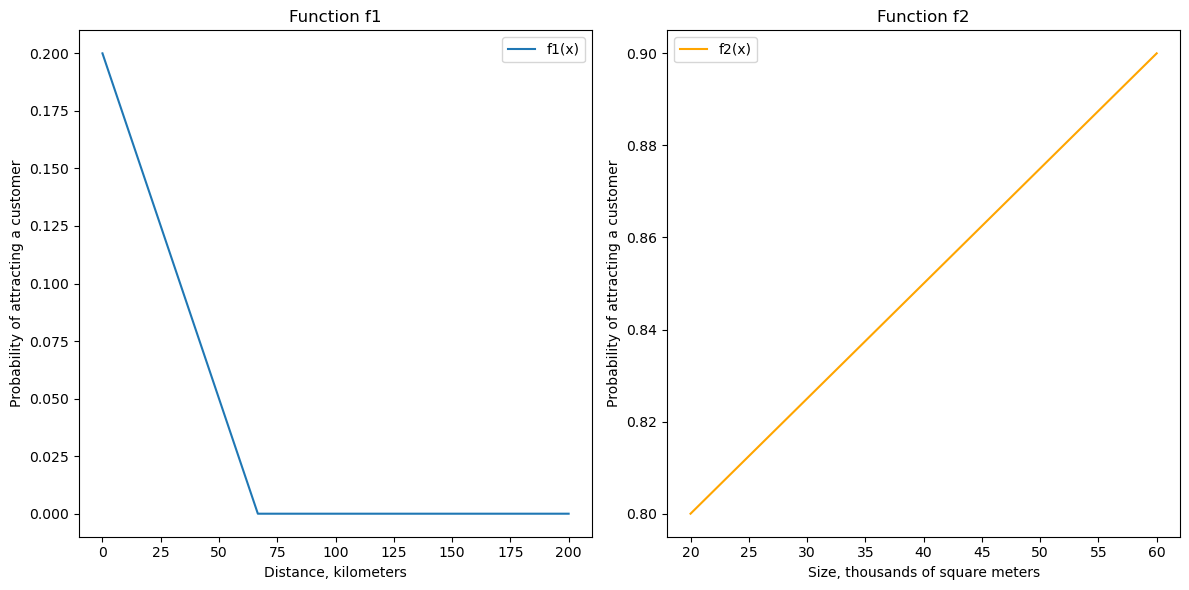

In [8]:
ebitda, cost  = get_coefficients(df_ter = df_ter,
                                 df_prop = df_prop, 
                                 yearly_ebitda_per_customer = 100,
                                 n_years_to_make_back_the_investment = 20,
                                 discount_rate = 0.1,
                                 f1 = lambda x: max(0, 0.2 - x * 0.003),
                                 f2 = lambda x: x * 0.0025 + 0.75,
                                 construction_cost = 1000)

ebitda, cost = pd.DataFrame(ebitda), pd.DataFrame(cost)

### 5.1.4 - Variables


In [10]:
# code that defines the variables
model = pyo.ConcreteModel()

num_y = cost.size

num_rows, num_cols = ebitda.shape


# Create x
model.rows = pyo.RangeSet(1,num_rows)
model.cols = pyo.RangeSet(1,num_cols)

# Define decision variables
model.x = pyo.Var(model.rows, model.cols, within = pyo.Binary)
model.y = pyo.Var(range(1, num_y + 1), within = pyo.Binary)


### 5.1.5 - Constraints and Objective(s)

In [11]:

# Define the objective function
def profit_function(model):
    # Calculate total cost
    cost_total = sum(model.y[j] * cost.iloc[j - 1, 0] for j in range(1, num_y + 1))

    # Calculate total EBITDA
    ebitda_total = sum(sum(ebitda.iloc[i - 1, j - 1] * model.x[i, j] for i in model.rows) for j in range(1, num_y + 1))

    # Calculate profit
    profit_total = ebitda_total - cost_total
    return profit_total

model.obj = pyo.Objective(rule = profit_function, sense = pyo.maximize)

# Define constraints
model.constraints = pyo.ConstraintList()
for j in range(1, num_y + 1):
    for i in range(1, num_rows + 1):
        model.constraints.add(model.x[i,j] <= ebitda.iloc[i-1, j-1] * model.y[j])

model.constraints2 = pyo.ConstraintList()
for i in range(1,num_rows +1):
    model.constraints2.add(sum(model.x[i,j] for j in range(1,num_cols+1)) <=1)

## 5.2 - Model solution


In [12]:
solver = pyo.SolverFactory('gurobi')
results = solver.solve(model, tee = True)

Set parameter Username
Academic license - for non-commercial use only - expires 2025-04-12
Read LP format model from file C:\Users\giuse\AppData\Local\Temp\tmpqf3fw1qv.pyomo.lp
Reading time = 0.37 seconds
x1: 112950 rows, 111518 columns, 282226 nonzeros
Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 11.0 (22631.2))

CPU model: 12th Gen Intel(R) Core(TM) i7-12650H, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 112950 rows, 111518 columns and 282226 nonzeros
Model fingerprint: 0xe9cb05bb
Variable types: 0 continuous, 111518 integer (111518 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+08]
  Objective range  [6e+00, 2e+08]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
         Consider reformulating model or setting NumericFocus parameter
         to avoid numerical issues.
Found heuristic solution: objective -0.0000000
Found heuristic solution: 

## 5.3 - Analysis


In [22]:
stores_to_open = dict()
for j in range(1,num_y+1):
    if pyo.value(model.y[j]) == 1:
        print(j,pyo.value(model.y[j]))
        print("Here are the comuni served by this store:")
        comuni_serviti = []
        comuni_serviti_with_0_ebitda = []
        for i in range(1, num_rows+1):
            if pyo.value(model.x[i,j]) == 1:
                if ebitda.iloc[i-1,j-1] > 1:
                    comuni_serviti.append(i-1)
                else: 
                    comuni_serviti_with_0_ebitda.append(i-1)
        stores_to_open[j] = comuni_serviti
        print(comuni_serviti)

index_to_access = list(stores_to_open.keys())
index_to_access = np.asarray(index_to_access)
index_to_access = index_to_access -1

n_comuni_serviti = {i-1 : len(comuni_serviti) for i, comuni_serviti in stores_to_open.items()}
n_comuni_serviti = pd.Series(n_comuni_serviti, name = "n_comuni")

result = df_prop.iloc[index_to_access].join(n_comuni_serviti)
result

5 1.0
Here are the comuni served by this store:
[0, 1, 10, 19, 33, 43, 60, 62, 73, 85, 87, 99, 100, 102, 117, 125, 156, 159, 171, 174, 177, 178, 189, 191, 196, 201, 208, 214, 231, 233, 238, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 257, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 271, 272, 273, 277, 278, 279, 280, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 306, 307, 308, 311, 312, 314, 317, 319, 320, 321, 323, 324, 326, 327, 329, 330, 332, 333, 335, 336, 337, 338, 339, 341, 342, 345, 346, 347, 348, 349, 350, 353, 354, 356, 357, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 388, 389, 391, 392, 395, 397, 398, 400, 402, 403, 404, 406, 407, 408, 409, 410, 413, 414, 415, 416, 418, 420, 424, 425, 428, 430, 432, 433, 434, 435, 437, 438, 439, 441, 442, 443, 447, 596, 598, 599, 602, 604, 607, 610, 613, 616, 

Title    Price  Surface m^2   Latitude  \
4           via casaglia, , travagliato  3440000       22.900  45.516099   
43                , gallaratese, milano   999000       32.000  45.495724   
44              via enrico fermi, curno  2760000       22.100  45.681248   
46        via galileo galilei, guanzate  2100000       21.000  45.713803   
68          via borgo oleario, magherno   450000       23.054  45.223390   
72   strada provinciale goitese, medole  1950000       20.000  45.338482   

    Longitude  n_comuni  
4   10.089211       223  
43   9.114956       156  
44   9.607452       361  
46   9.020662       334  
68   9.327665       251  
72  10.547003       139

In [21]:
total_profit = pyo.value(model.obj)
initial_investment = result.Price.sum() + result["Surface m^2"].sum()*10**6

print("Total present value profit over the next 20 years is", total_profit)
print("The initial investment required is", initial_investment)

Total present value profit over the next 20 years is 976537103.0553043
The initial investment required is 152753000.0


### Map


In [23]:
# Municipalities served by stores
def get_comuni_served_by_store(varj_index):
    total_ebitda_from_comuni = ebitda[varj_index-1]
    total_ebitda_from_comuni.name = "ebitda"
    distance_from_store = distances_matrix[varj_index-1]
    distance_from_store.name = "distance"
    comuni_serviti_df = df_ter.iloc[stores_to_open[varj_index]].join(total_ebitda_from_comuni).join(distance_from_store).sort_values(by = "ebitda", ascending = False)
    comuni_serviti_df.columns.name = result.Title.loc[varj_index -1]
    return comuni_serviti_df

pd.options.display.max_rows = 10
get_comuni_served_by_store(result.index[0]+1)

via casaglia, , travagliato PROVINCE Denominazione Comune  \
271                           Brescia              Brescia   
630                           Cremona              Cremona   
407                           Brescia               Rovato   
294                           Brescia               Chiari   
338                           Brescia            Lumezzane   
..                                ...                  ...   
296                           Brescia             Cimbergo   
377                           Brescia             Paspardo   
289                           Brescia             Cedegolo   
373                           Brescia        Paisco Loveno   
293                           Brescia                 Cevo   

 via casaglia, , travagliato  Popolazione al 1° gennaio - Totale   Latitude  \
271                                                       197304  45.541281   
630                                                        71223  45.133745   
407                                                        19189  45.567039   
294                                                        19094  45.536462   
338                                                        21669  45.648258   
..                                                           ...        ...   
296                                                          534  46.024096   
377                                                          587  46.030996   
289                                                         1096  46.076647   
373                                                          173  46.078305   
293                                                          831  46.081397   

 via casaglia, , travagliato  Longitude        ebitda   distance  
271                           10.211064  2.540329e+07   9.896430  
630                           10.021727  3.848410e+06  42.841954  
407                            9.998601  2.507511e+06   9.048801  
294                            9.928846  2.337150e+06  12.696197  
338                           10.264546  2.290765e+06  20.053535  
..                                  ...           ...        ...  
296                           10.365663  7.565971e+03  60.419400  
377                           10.370963  7.168256e+03  61.282208  
289                           10.350068  2.828915e+03  65.528579  
373                           10.290733  8.748427e+02  64.436946  
293                           10.368562  3.441946e+02  66.484038  

[223 rows x 7 columns]

In [25]:
def create_map_with_markers(locations):
    mymap = folium.Map(location=[locations.iloc[0]["Latitude"], locations.iloc[0]["Longitude"]], zoom_start=7)
    
    comuni_non_serviti = folium.FeatureGroup(name="Comuni non serviti", show=False).add_to(mymap)

    indexes_comuni_non_serviti = set(range(df_ter.shape[0]))

    colors = ['lightred', 'blue', 'cadetblue', 'orange', 'lightblue', 'pink', 'black', 'darkgreen', 'darkpurple', 'lightgray', 'green', 'white', 'beige', 'darkblue']
    for iteration ,(i, row) in enumerate(locations.iterrows()):
        town_feature_group = folium.FeatureGroup(name=row["Title"], show=False).add_to(mymap)
        folium.Marker([row["Latitude"], row["Longitude"]],popup=row["Title"],icon=folium.Icon(color='red')).add_to(mymap)

        comuni_serviti = get_comuni_served_by_store(int(i)+1)
        indexes_comuni_non_serviti -= set(comuni_serviti.index)
        for town_index,town in comuni_serviti.iterrows():
            if town["ebitda"] > 1:
                folium.Marker([town["Latitude"], town["Longitude"]], popup=town["Denominazione Comune"],icon=folium.Icon(color=colors[iteration])).add_to(town_feature_group)
            else :
                folium.Marker([town["Latitude"], town["Longitude"]], popup=town["Denominazione Comune"],icon=folium.Icon(color='gray')).add_to(comuni_non_serviti)
        town_feature_group.add_to(mymap)
    
    for index in indexes_comuni_non_serviti:
        folium.Marker([df_ter.loc[index,"Latitude"], df_ter.loc[index,"Longitude"]], popup=df_ter.loc[index,"Denominazione Comune"],icon=folium.Icon(color='gray')).add_to(comuni_non_serviti)

    comuni_non_serviti.add_to(mymap)
    folium.LayerControl().add_to(mymap)
    display(mymap)

# Assuming `result` is a DataFrame with "Latitude" and "Longitude" columns
locations = result[["Latitude", "Longitude","Title"]]

create_map_with_markers(locations)

# 6 - Scenario 2

The initial investment has to be under 35 million € so we add another constraint to apply a realistic situation. 

In [26]:
model = pyo.ConcreteModel()

num_y = cost.size

num_rows, num_cols = ebitda.shape


# Create x
model.rows = pyo.RangeSet(1,num_rows)
model.cols = pyo.RangeSet(1,num_cols)

# Define decision variables
model.x = pyo.Var(model.rows, model.cols, within = pyo.UnitInterval)
model.y = pyo.Var(range(1, num_y + 1), within = pyo.Binary)

# Define the objective function programmatically
def profit_function(model):
    # Calculate total cost
    cost_total = sum(model.y[j] * cost.iloc[j - 1, 0] for j in range(1, num_y + 1))

    # Calculate total EBITDA
    ebitda_total = sum(sum(ebitda.iloc[i - 1, j - 1] * model.x[i, j] for i in model.rows) for j in range(1, num_y + 1))

    # Calculate profit
    profit_total = ebitda_total - cost_total
    return profit_total

model.obj = pyo.Objective(rule = profit_function, sense = pyo.maximize)

# Define constraints
model.constraints = pyo.ConstraintList()
for j in range(1, num_y + 1):
    for i in range(1, num_rows + 1):
        model.constraints.add(model.x[i,j] <= ebitda.iloc[i-1, j-1] * model.y[j])

model.constraints2 = pyo.ConstraintList()
for i in range(1,num_rows +1):
    model.constraints2.add(sum(model.x[i,j] for j in range(1,num_cols+1)) <= 1)

max_total_cost = 35 * 10 **6 

# Add constraint for maximum total cost
model.constraints3 = pyo.ConstraintList()
model.constraints.add(sum(model.y[j] * cost.iloc[j - 1, 0] for j in range(1, num_y + 1)) <= max_total_cost)


## 6.2 - Model solution


In [27]:
solver = pyo.SolverFactory('gurobi')
results = solver.solve(model, tee = True)

Set parameter Username
Academic license - for non-commercial use only - expires 2025-04-12
Read LP format model from file C:\Users\giuse\AppData\Local\Temp\tmp2cmv_pwl.pyomo.lp
Reading time = 0.35 seconds
x1: 112951 rows, 111518 columns, 282300 nonzeros
Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 11.0 (22631.2))

CPU model: 12th Gen Intel(R) Core(TM) i7-12650H, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 112951 rows, 111518 columns and 282300 nonzeros
Model fingerprint: 0xebbaf660
Variable types: 111444 continuous, 74 integer (74 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+08]
  Objective range  [6e+00, 2e+08]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 4e+07]
         Consider reformulating model or setting NumericFocus parameter
         to avoid numerical issues.
Found heuristic solution: objective -0.0000000
Presolve removed 64397 rows a

## 6.3 - Analysis

In [29]:
stores_to_open = dict()
for j in range(1,num_y+1):
    if pyo.value(model.y[j]) == 1:
        print(j,pyo.value(model.y[j]))
        print("Here are the comuni served by this store:")
        comuni_serviti = []
        comuni_serviti_with_0_ebitda = []
        for i in range(1, num_rows+1):
            if pyo.value(model.x[i,j]) == 1:
                if ebitda.iloc[i-1,j-1] > 1:
                    comuni_serviti.append(i-1)
                else: 
                    comuni_serviti_with_0_ebitda.append(i-1)
        stores_to_open[j] = comuni_serviti
        print(comuni_serviti)

index_to_access = list(stores_to_open.keys())
index_to_access = np.asarray(index_to_access)
index_to_access = index_to_access -1

n_comuni_serviti = {i-1 : len(comuni_serviti) for i, comuni_serviti in stores_to_open.items()}
n_comuni_serviti = pd.Series(n_comuni_serviti, name = "n_comuni")

result = df_prop.iloc[index_to_access].join(n_comuni_serviti)
result

44 1.0
Here are the comuni served by this store:
[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 15, 16, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 31, 32, 34, 35, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 56, 58, 59, 60, 63, 65, 66, 67, 69, 70, 71, 72, 73, 76, 78, 79, 80, 81, 82, 83, 84, 86, 87, 88, 90, 91, 93, 94, 95, 96, 98, 99, 102, 103, 104, 107, 108, 109, 110, 111, 112, 114, 117, 119, 120, 122, 123, 124, 126, 127, 128, 129, 130, 131, 133, 136, 137, 138, 139, 140, 141, 147, 148, 149, 150, 151, 152, 153, 154, 157, 161, 164, 166, 167, 168, 169, 170, 173, 174, 175, 179, 181, 182, 184, 185, 186, 188, 190, 192, 193, 194, 195, 197, 199, 200, 203, 204, 205, 206, 207, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 222, 226, 227, 228, 229, 232, 234, 235, 236, 240, 241, 242, 270, 280, 284, 294, 301, 302, 367, 368, 375, 392, 403, 408, 434, 442, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 47

Title   Price  Surface m^2   Latitude  Longitude  n_comuni
43  , gallaratese, milano  999000         32.0  45.495724   9.114956      1006

In [30]:
total_profit = pyo.value(model.obj)
initial_investment = result.Price.sum() + result["Surface m^2"].sum()*10**6

print("Total present value profit over the next 20 years is", total_profit)
print("The initial investment required is", initial_investment)

Total present value profit over the next 20 years is 710245334.8738805
The initial investment required is 32999000.0


### Map


In [33]:
# Municipalities served by stores
def get_comuni_served_by_store(varj_index):
    
    total_ebitda_from_comuni = ebitda[varj_index-1]
    total_ebitda_from_comuni.name = "ebitda"
    distance_from_store = distances_matrix[varj_index-1]
    distance_from_store.name = "distance"
    comuni_serviti_df = df_ter.iloc[stores_to_open[varj_index]].join(total_ebitda_from_comuni).join(distance_from_store).sort_values(by = "ebitda", ascending = False)
    comuni_serviti_df.columns.name = result.Title.loc[varj_index -1]
    return comuni_serviti_df

pd.options.display.max_rows = 10
get_comuni_served_by_store(result.index[0]+1)

, gallaratese, milano               PROVINCE      Denominazione Comune  \
989                                   Milano                    Milano   
1086                   Monza e della Brianza                     Monza   
1029                                  Milano        Sesto San Giovanni   
955                                   Milano         Cinisello Balsamo   
1393                                  Varese             Busto Arsizio   
...                                      ...                       ...   
148                                  Bergamo                    Ornica   
489                                     Como                  Cavargna   
108                                  Bergamo            Gaverina Terme   
771                                    Lecco                   Pagnona   
1428                                  Varese  Curiglia con Monteviasco   

, gallaratese, milano  Popolazione al 1° gennaio - Totale   Latitude  \
989                                               1374582  45.463596   
1086                                               122522  45.582329   
1029                                                80203  45.535722   
955                                                 74636  45.558645   
1393                                                83045  45.611932   
...                                                   ...        ...   
148                                                   144  45.988971   
489                                                   191  46.090086   
108                                                   862  45.755784   
771                                                   337  46.059741   
1428                                                  156  46.059392   

, gallaratese, milano  Longitude        ebitda   distance  
989                     9.187651  1.922146e+08   6.699683  
1086                    9.271133  1.461449e+07  15.514245  
1029                    9.237655  1.049618e+07  10.544136  
955                     9.214196  9.788056e+06  10.426749  
1393                    8.851827  8.219305e+06  24.222485  
...                          ...           ...        ...  
148                     9.579479  3.474522e+02  65.631932  
489                     9.111234  2.565267e+02  66.090702  
108                     9.886657  1.067206e+02  66.613574  
771                     9.402893  7.397235e+01  66.572535  
1428                    8.826491  4.255954e+01  66.549671  

[1006 rows x 7 columns]

In [32]:
locations = result[["Latitude", "Longitude","Title"]]

create_map_with_markers(locations)